# Loading Data

In [0]:
# loading data
!git clone https://github.com/MarcelBurger/Bitcoin-Data-Analysis.git

Cloning into 'Bitcoin-Data-Analysis'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 21 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (21/21), done.


In [0]:
!ls

Bitcoin-Data-Analysis  bitcoindataset.csv  README.md


In [0]:
%cd Bitcoin-Data-Analysis/

/content/Bitcoin-Data-Analysis/Bitcoin-Data-Analysis


In [0]:
!ls

bitcoindataset.csv  README.md


# Data Exploration

In [0]:
# data exploration
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('bitcoindataset.csv')
print(df.shape)
df.head()

(3200, 12)


,timestamp,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving
0,2010-10-13,84963.0,0.105,1378.028165,4248150.0,-2.253795,NaN,NaN,NaN,NaN,125037.0,84963.0
1,2010-10-14,85168.0,0.102,1378.028165,4258400.0,-2.282782,-0.028571,-0.028988,NaN,1.135489,124832.0,85168.0
2,2010-10-15,85345.0,0.105,1378.028165,4267250.0,-2.253795,0.029412,0.028988,NaN,1.318288,124655.0,85345.0
3,2010-10-16,85603.0,0.101,1378.028165,4280150.0,-2.292635,-0.038095,-0.038840,NaN,0.906287,124397.0,85603.0
4,2010-10-17,85873.0,0.102,1378.028165,4293650.0,-2.282782,0.009901,0.009852,NaN,0.868625,124127.0,85873.0


In [0]:
df.tail()

,timestamp,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving
3195,2019-07-19,586116.0,10538.535590,9.064160e+12,17826450.0,9.262794,-0.010265,-0.010318,1.311793,33.108846,43884.0,43884.0
3196,2019-07-20,586293.0,10761.187378,9.064160e+12,17828662.5,9.283701,0.021127,0.020907,1.310733,22.074391,43707.0,43707.0
3197,2019-07-21,586442.0,10591.299465,9.064160e+12,17830525.0,9.267788,-0.015787,-0.015913,1.290440,26.225853,43558.0,43558.0
3198,2019-07-22,586600.0,10327.950395,9.064160e+12,17832500.0,9.242609,-0.024865,-0.025179,1.285901,24.734559,43400.0,43400.0
3199,2019-07-23,586663.0,9848.972543,9.033161e+12,17833287.5,9.195122,-0.046377,-0.047487,1.295404,62.039574,43337.0,43337.0


In [0]:
df.describe()

,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving
count,3200.000000,3200.000000,3.200000e+03,3.200000e+03,3200.000000,3199.000000,3199.000000,3170.000000,3199.000000,3200.000000,3200.000000
mean,342102.352500,1884.508201,1.117985e+12,1.308259e+07,5.387364,0.005172,0.003579,0.881282,13.091749,100144.522500,56107.751250
std,144174.122379,3193.872992,2.207500e+12,3.746149e+06,2.826161,0.056554,0.056436,0.591548,9.235065,57354.255549,30362.714362
min,84963.000000,0.097062,1.378028e+03,4.248150e+06,-2.332401,-0.482353,-0.658462,0.153326,0.241781,102.000000,47.000000
25%,213886.000000,15.430346,3.304356e+06,1.059715e+07,2.736335,-0.013738,-0.013833,0.478749,6.065639,54656.000000,30502.750000
50%,346556.000000,412.688478,4.668438e+10,1.391390e+07,6.022693,0.002209,0.002206,0.715541,10.081474,95084.500000,58134.000000
75%,466477.500000,1781.336473,5.599709e+11,1.633097e+07,7.485115,0.022390,0.022143,1.057138,22.970136,146099.500000,82782.000000
max,586663.000000,19324.228424,9.064160e+12,1.783329e+07,9.869115,0.564992,0.447881,3.248011,62.039574,209953.000000,104981.000000


In [0]:
df.dtypes

timestamp                     object
blockheight                  float64
close                        float64
difficulty                   float64
supply                       float64
lnprice                      float64
Ret                          float64
Log_Ret                      float64
Volatility                   float64
S2F                          float64
blocks_to_halving            float64
blocks_to_nearest_halving    float64
dtype: object

In [0]:
df.count()

timestamp                    3200
blockheight                  3200
close                        3200
difficulty                   3200
supply                       3200
lnprice                      3200
Ret                          3199
Log_Ret                      3199
Volatility                   3170
S2F                          3199
blocks_to_halving            3200
blocks_to_nearest_halving    3200
dtype: int64

In [0]:
# identify NaN values
df.isnull().sum()

timestamp                     0
blockheight                   0
close                         0
difficulty                    0
supply                        0
lnprice                       0
Ret                           1
Log_Ret                       1
Volatility                   30
S2F                           1
blocks_to_halving             0
blocks_to_nearest_halving     0
dtype: int64

In [0]:
df[df.isna().any(axis=1)]

,timestamp,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving
0,2010-10-13,84963.0,0.105000,1378.028165,4248150.0,-2.253795,NaN,NaN,NaN,NaN,125037.0,84963.0
1,2010-10-14,85168.0,0.102000,1378.028165,4258400.0,-2.282782,-0.028571,-0.028988,NaN,1.135489,124832.0,85168.0
2,2010-10-15,85345.0,0.105000,1378.028165,4267250.0,-2.253795,0.029412,0.028988,NaN,1.318288,124655.0,85345.0
3,2010-10-16,85603.0,0.101000,1378.028165,4280150.0,-2.292635,-0.038095,-0.038840,NaN,0.906287,124397.0,85603.0
4,2010-10-17,85873.0,0.102000,1378.028165,4293650.0,-2.282782,0.009901,0.009852,NaN,0.868625,124127.0,85873.0
5,2010-10-18,86122.0,0.102400,1378.028165,4306100.0,-2.278869,0.003922,0.003914,NaN,0.944853,123878.0,86122.0
6,2010-10-19,86378.0,0.097062,1378.028165,4318900.0,-2.332401,-0.052124,-0.053532,NaN,0.921682,123622.0,86378.0
7,2010-10-20,86642.0,0.099000,1378.028165,4332100.0,-2.312635,0.019962,0.019765,NaN,0.896409,123358.0,86642.0
8,2010-10-21,86828.0,0.107000,1962.491093,4341400.0,-2.234926,0.080808,0.077709,NaN,1.276212,123172.0,86828.0
9,2010-10-22,86982.0,0.103781,2149.021815,4349100.0,-2.265470,-0.030082,-0.030544,NaN,1.544707,123018.0,86982.0


I'm retaining NaN values as replacing them with '0' would be misleading.

# Make Features

In order to better illustrate "difficulty" I need to convert this log scale as there are a few points which are much larger than the bulk of the data.

In [0]:

df['lndifficulty'] = np.log(df['difficulty'])


In [0]:
print(df.shape)
df.head()

(3200, 13)


,timestamp,blockheight,close,difficulty,supply,lnprice,Ret,Log_Ret,Volatility,S2F,blocks_to_halving,blocks_to_nearest_halving,lndifficulty
0,2010-10-13,84963.0,0.105,1378.028165,4248150.0,-2.253795,NaN,NaN,NaN,NaN,125037.0,84963.0,7.228409
1,2010-10-14,85168.0,0.102,1378.028165,4258400.0,-2.282782,-0.028571,-0.028988,NaN,1.135489,124832.0,85168.0,7.228409
2,2010-10-15,85345.0,0.105,1378.028165,4267250.0,-2.253795,0.029412,0.028988,NaN,1.318288,124655.0,85345.0,7.228409
3,2010-10-16,85603.0,0.101,1378.028165,4280150.0,-2.292635,-0.038095,-0.038840,NaN,0.906287,124397.0,85603.0,7.228409
4,2010-10-17,85873.0,0.102,1378.028165,4293650.0,-2.282782,0.009901,0.009852,NaN,0.868625,124127.0,85873.0,7.228409


In [0]:
# dropping the categorical column for the correlation matrix
df2 = df.copy()
df2.drop(['timestamp'], axis=1, inplace=True)

# Experimental Visualizations

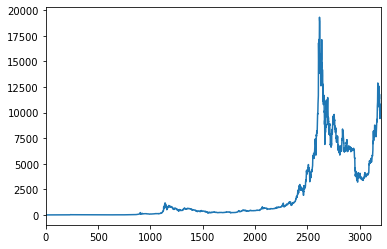

In [0]:
df['close'].plot();

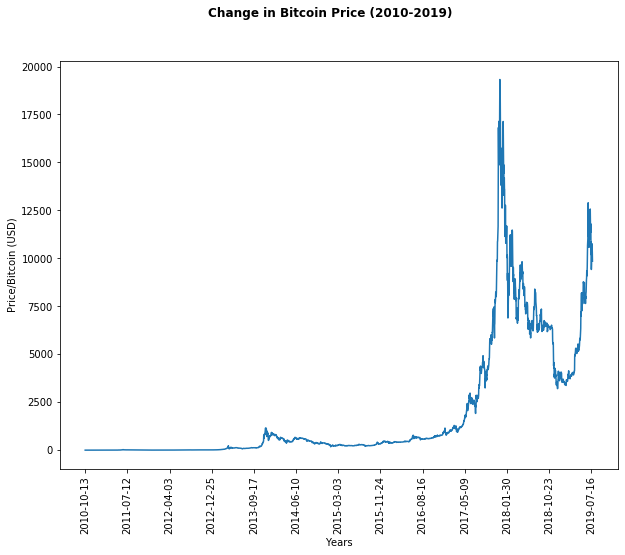

In [0]:
plt.figure(figsize=(10,7.5))
plt.plot(df['timestamp'], df['close'], lw=1.5)
plt.suptitle("Change in Bitcoin Price (2010-2019)", fontweight='bold')
plt.xlabel('Years')
plt.ylabel('Price/Bitcoin (USD)')
plt.xticks(np.arange(0, 3458, 266), rotation=90)
plt.show()

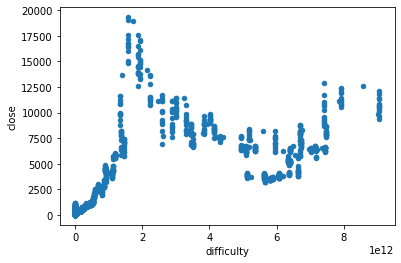

In [0]:
df.plot.scatter('difficulty', 'close')

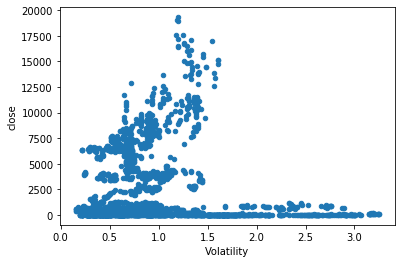

In [0]:
df.plot.scatter('Volatility', 'close');

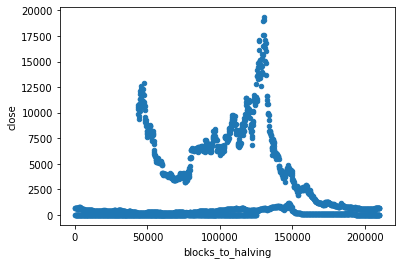

In [0]:
df.plot.scatter('blocks_to_halving', 'close');

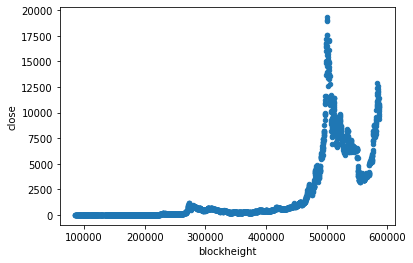

In [0]:
df.plot.scatter('blockheight', 'close');

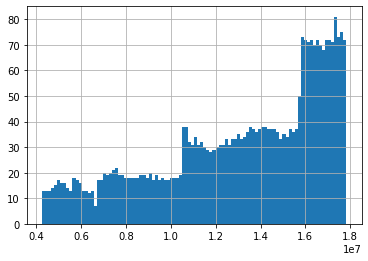

In [0]:
df['supply'].hist(bins=100)
plt.show()

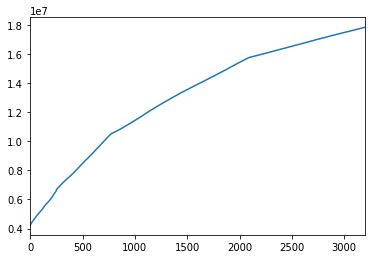

In [0]:
df['supply'].plot();

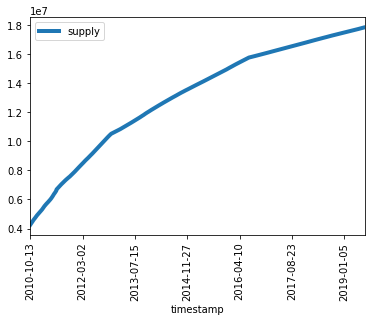

In [0]:
df.plot(x='timestamp', y='supply', kind='line', rot=90, lw=4)
plt.show()

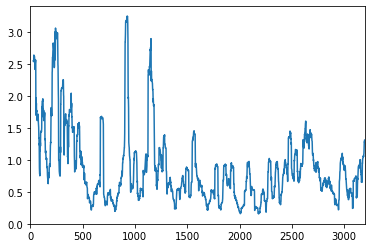

In [0]:
df['Volatility'].plot();

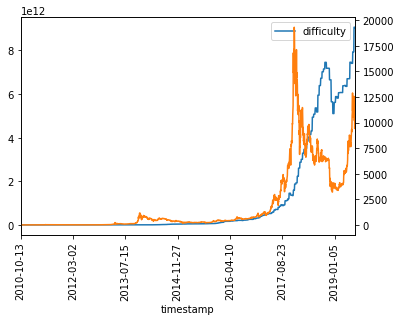

In [0]:
df.plot(x='timestamp', y='difficulty', kind='line', rot=90)
df.close.plot(secondary_y=True, rot=90)
plt.show()

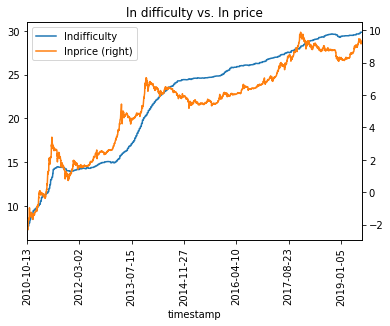

In [0]:
df.plot(x='timestamp', y='lndifficulty', kind='line', rot=90, use_index=True, title='ln difficulty vs. ln price')
df.lnprice.plot(secondary_y=True, rot=90, legend=True)
plt.show()

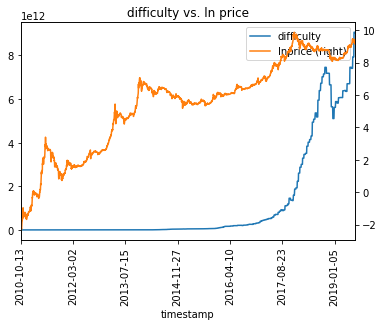

In [0]:
df.plot(x='timestamp', y='difficulty', kind='line', rot=90, use_index=True, title='difficulty vs. ln price')
df.lnprice.plot(secondary_y=True, rot=90, legend=True)
plt.show()

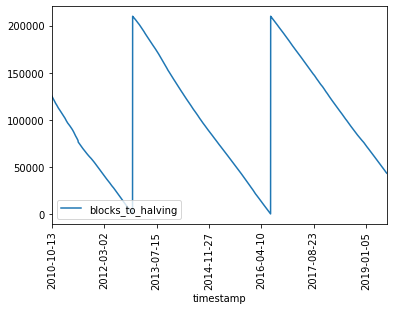

In [0]:
df.plot(x='timestamp', y='blocks_to_halving', kind='line', rot=90)
plt.show()

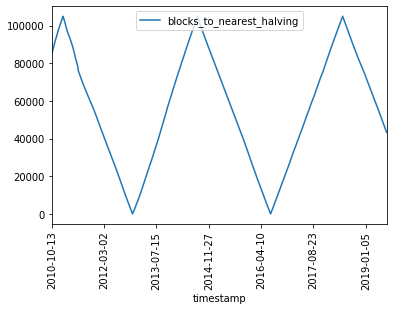

In [0]:
df.plot(x='timestamp', y='blocks_to_nearest_halving', kind='line', rot=90)
plt.show()

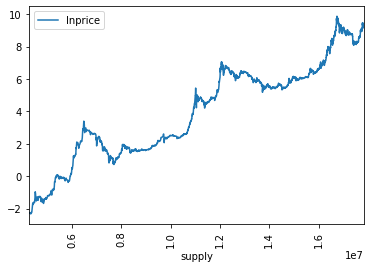

In [0]:
df.plot(x='supply', y='lnprice', kind='line', rot=90)
plt.show()

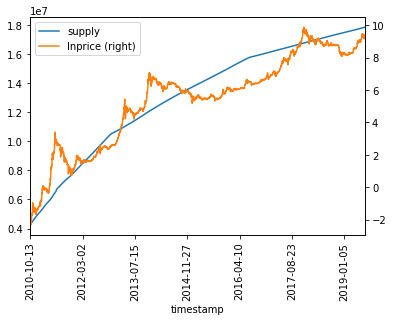

In [0]:
df.plot(x='timestamp', y='supply', kind='line', rot=90)
df.lnprice.plot(secondary_y=True, rot=90, legend=True)
plt.show()

 # Final Visualizations

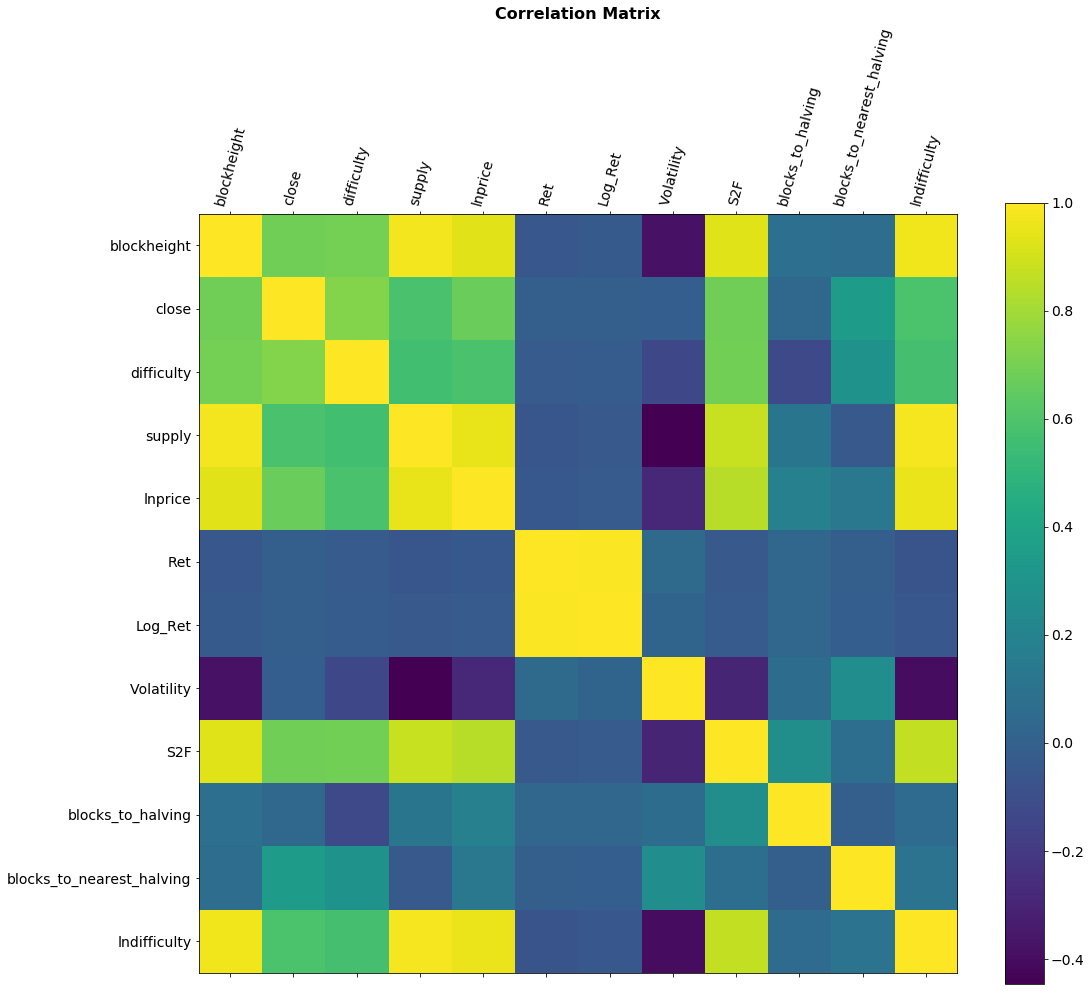

In [0]:
f = plt.figure(figsize=(17,14))
plt.matshow(df2.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(range(12), df2.columns, fontsize=14, rotation=75)
plt.yticks(range(12), df2.columns, fontsize=14)
plt.title('Correlation Matrix', fontsize=16, y=1, fontweight='bold')
plt.show()


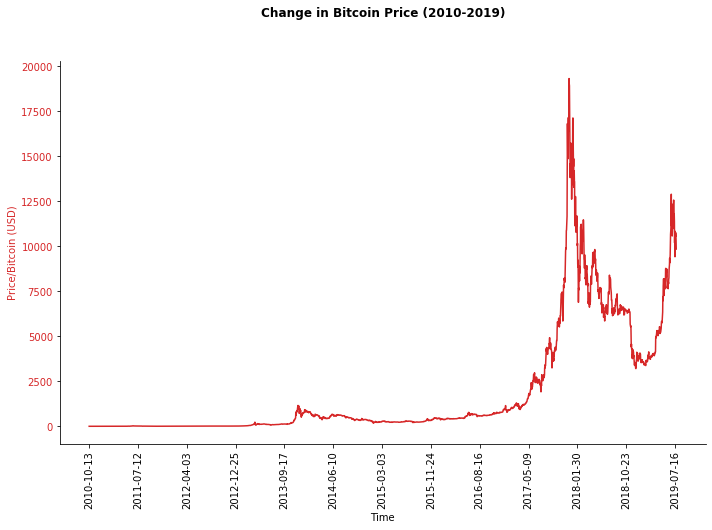

In [0]:
fig, ax1 = plt.subplots(figsize=(10,7.5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price/Bitcoin (USD)', color=color)
ax1.plot(df['timestamp'], df['close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(range(0,3458,266))
ax1.set_xticklabels(xlabels, rotation=90)

ax1.set_title("Change in Bitcoin Price (2010-2019)", 
             fontsize=12, fontweight='bold', horizontalalignment='center', y=1.1)

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

fig.tight_layout()
plt.show()

In [0]:
# creating xlabels
xlabels = df['timestamp'].iloc[range(0,3458,266)]
xlabels.head()

0       2010-10-13
266     2011-07-12
532     2012-04-03
798     2012-12-25
1064    2013-09-17
Name: timestamp, dtype: object

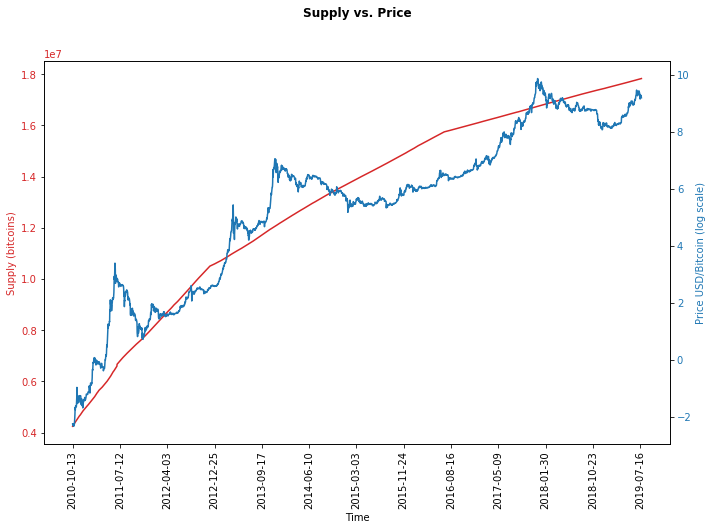

In [0]:
fig, ax1 = plt.subplots(figsize=(10,7.5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Supply (bitcoins)', color=color)
ax1.plot(df['timestamp'], df['supply'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(range(0,3458,266))
ax1.set_xticklabels(xlabels, rotation=90)

# create a second axes that shares the same x-axis
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price USD/Bitcoin (log scale)', color=color)
ax2.plot(df['timestamp'], df['lnprice'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(range(0,3458,266))
ax2.set_xticklabels(xlabels, rotation=90)

ax1.set_title("Supply vs. Price", 
             fontsize=12, fontweight='bold', horizontalalignment='center', y=1.1)

fig.tight_layout()
plt.show()

<Figure size 720x576 with 0 Axes>

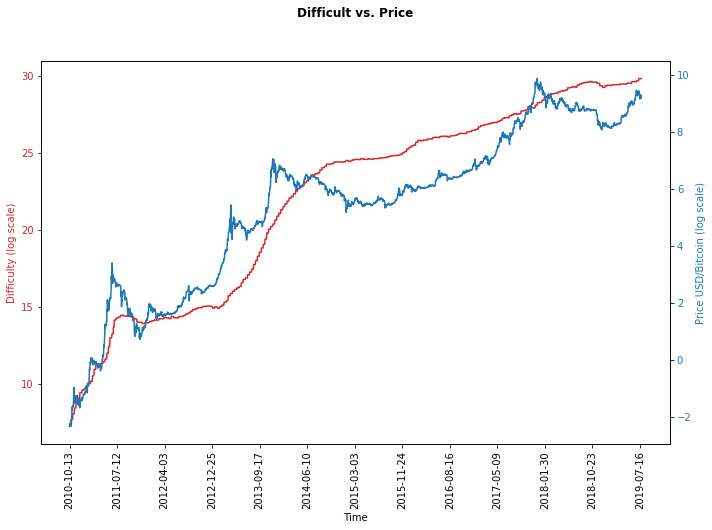

In [0]:
plt.figure(figsize=(10,8))
fig, ax1 = plt.subplots(figsize=(10,7.5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Difficulty (log scale)', color=color)
ax1.plot(df['timestamp'], df['lndifficulty'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.set_xticks(range(0,3458,266))
ax1.set_xticklabels(xlabels, rotation=90)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Price USD/Bitcoin (log scale)', color=color)
ax2.plot(df['timestamp'], df['lnprice'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xticks(range(0,3458,266))
ax2.set_xticklabels(xlabels, rotation=90)

ax1.set_title("Difficult vs. Price", 
             fontsize=12, fontweight='bold', horizontalalignment='center', y=1.1)

fig.tight_layout()
plt.show()